In [1]:
cd TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [51]:
cd output/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


In [ ]:
def plot_postprocess_PR_curves(objid,method="majority_top_k",new_canvas=False,experiment_idx=0,color='blue',legend=False,sampleNworker=-1,PLOT_WORKER=True):
    '''
    Plot PR curves for each object for one post-processing methods
    new_canvas: True, if initialization of new canvas
    '''
    DATA_DIR = 'output'
    if new_canvas: 
        plt.figure()
        plt.title("Object #{0} [{1}]".format(objid,method))
        plt.xlim(0,1.05)
        plt.ylim(0,1.05)
        plt.ylabel("Precision",fontsize=13)
        plt.xlabel("Recall",fontsize=13)
    if sampleNworker!=-1:
        DATA_DIR='{}_worker_output/'.format(sampleNworker)
        os.chdir("../"+DATA_DIR)
    # Worker Individual Precision and Recall based on their BB drawn for this object
    worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid)
    # Plotting PR from Top-k Majority vote 
    os.chdir("..")
    tiles, objIndicatorMat = createObjIndicatorMatrix(objid,PRINT=False,PLOT=False)
    os.chdir(DATA_DIR)
    precision_lst = []
    recall_lst = []
    if method=='majority_top_k':
        param_lst = np.arange(1,len(tiles),max(int((len(tiles)-1)/30.),1))
        for  k in param_lst:
            precision,recall= compute_PR_obj(objid,majority_topk=k)
            precision_lst.append(precision)
            recall_lst.append(recall)
    elif method=="gamma_threshold":
        param_lst = np.linspace(0,0.95,20)
        for  threshold in param_lst :
            precision,recall= compute_PR_obj(objid,threshold=threshold)
            precision_lst.append(precision)
            recall_lst.append(recall)
    elif method=="gamma_top_k":
        param_lst = np.arange(1,len(tiles),max(int((len(tiles)-1)/30.),1))
        for  k in param_lst :
            precision,recall= compute_PR_obj(objid,2,topk=k)
            precision_lst.append(precision)
            recall_lst.append(recall)
    recall_lst = np.array(recall_lst)
    precision_lst = np.array(precision_lst)
    if new_canvas and PLOT_WORKER:
        plt.plot(worker_recall_lst ,worker_precision_lst,'^',color="gray",label="Worker ")
    plt.plot(recall_lst,precision_lst, linestyle='-', linewidth=1,marker='.',color=color,label="N={}".format(sampleNworker))
    if legend: plt.legend(loc="lower left",ncol=3,fontsize=11,numpoints=1)
    if sampleNworker==-1:
        plt.savefig("../PR_obj_{0}_{1}.pdf".format(objid,method))
    else:
        plt.savefig("../sampleWorker_PR_obj_{0}_{1}.pdf".format(objid,method))

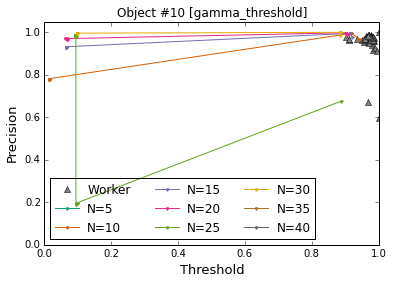

In [38]:
objid=10
all_Nsample = np.arange(5,41,5)
colors=cm.Dark2(np.linspace(0,1,len(all_Nsample)))
for n,i in zip(all_Nsample,range(len(all_Nsample))):
    if i==0:
        plot_postprocess_PR_curves(objid,method='gamma_threshold',sampleNworker=n,color=colors[i],new_canvas=True)
    else:
        plot_postprocess_PR_curves(objid,method='gamma_threshold',color=colors[i],sampleNworker=n,legend=True)

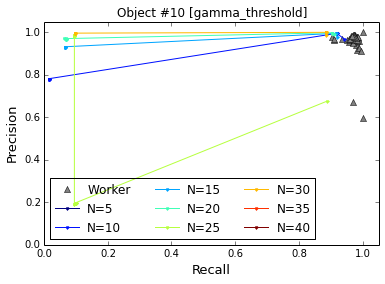

In [43]:
objid=10
all_Nsample = np.arange(5,41,5)
colors=cm.jet(np.linspace(0,1,len(all_Nsample)))
for n,i in zip(all_Nsample,range(len(all_Nsample))):
    if i==0:
        plot_postprocess_PR_curves(objid,method='gamma_threshold',sampleNworker=n,color=colors[i],new_canvas=True)
    else:
        plot_postprocess_PR_curves(objid,method='gamma_threshold',color=colors[i],sampleNworker=n,legend=True)

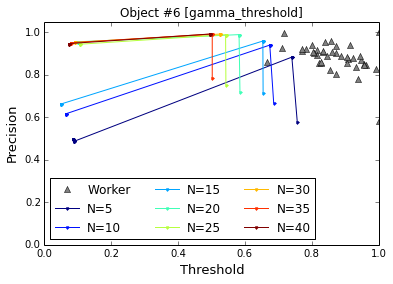

In [39]:
objid=6
all_Nsample = np.arange(5,41,5)
colors=cm.jet(np.linspace(0,1,len(all_Nsample)))
for n,i in zip(all_Nsample,range(len(all_Nsample))):
    if i==0:
        plot_postprocess_PR_curves(objid,method='gamma_threshold',sampleNworker=n,color=colors[i],new_canvas=True)
    else:
        plot_postprocess_PR_curves(objid,method='gamma_threshold',color=colors[i],sampleNworker=n,legend=True)

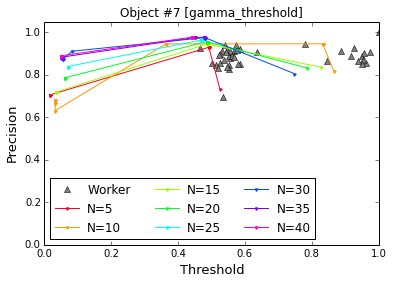

In [40]:
objid=7
all_Nsample = np.arange(5,41,5)
colors=cm.gist_rainbow(np.linspace(0,1,len(all_Nsample)))
for n,i in zip(all_Nsample,range(len(all_Nsample))):
    if i==0:
        plot_postprocess_PR_curves(objid,method='gamma_threshold',sampleNworker=n,color=colors[i],new_canvas=True)
    else:
        plot_postprocess_PR_curves(objid,method='gamma_threshold',color=colors[i],sampleNworker=n,legend=True)

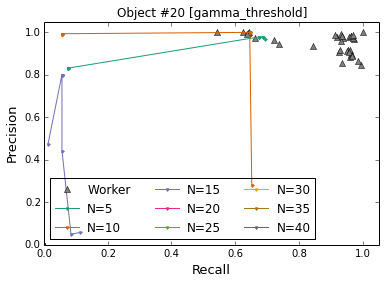

In [42]:
objid=20
all_Nsample = np.arange(5,41,5)
colors=cm.Dark2(np.linspace(0,1,len(all_Nsample)))
for n,i in zip(all_Nsample,range(len(all_Nsample))):
    if i==0:
        plot_postprocess_PR_curves(objid,method='gamma_threshold',sampleNworker=n,color=colors[i],new_canvas=True)
    else:
        plot_postprocess_PR_curves(objid,method='gamma_threshold',color=colors[i],sampleNworker=n,legend=True)

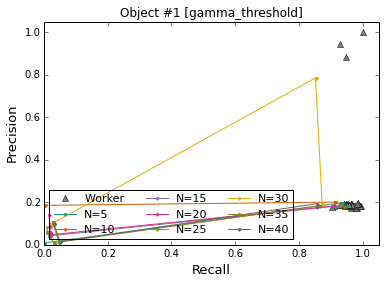

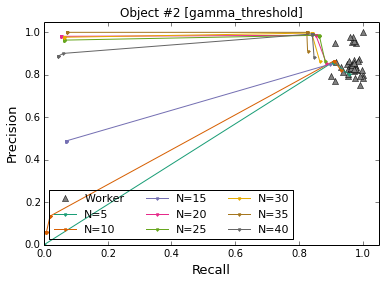

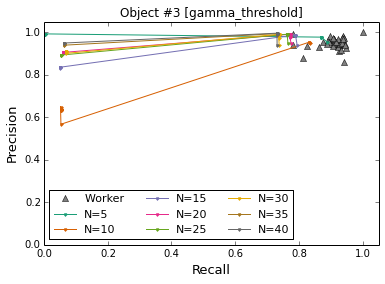

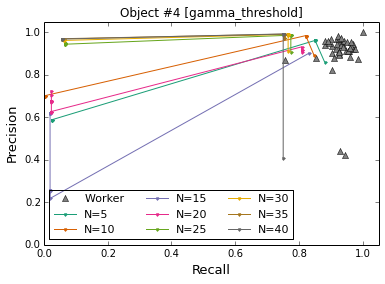

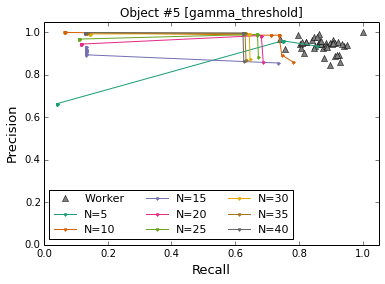

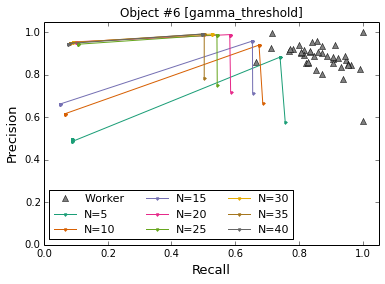

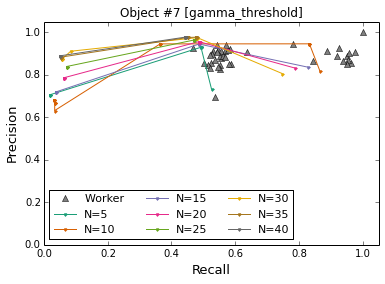

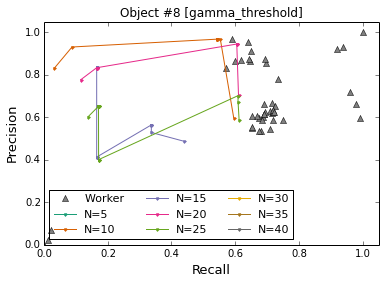

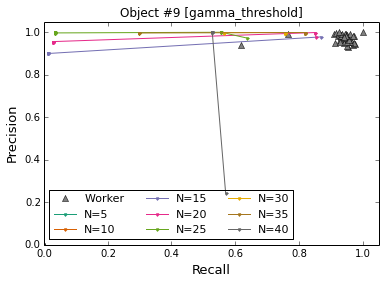

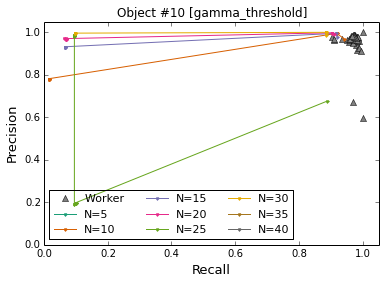

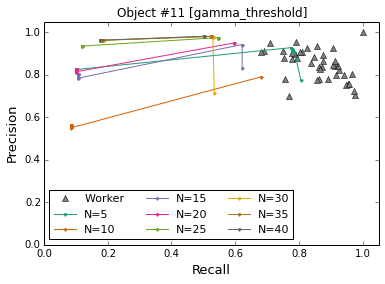

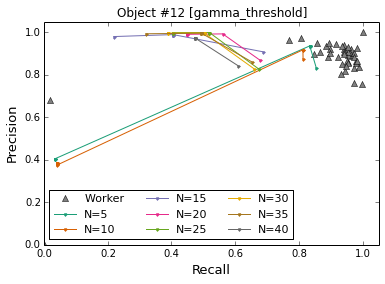

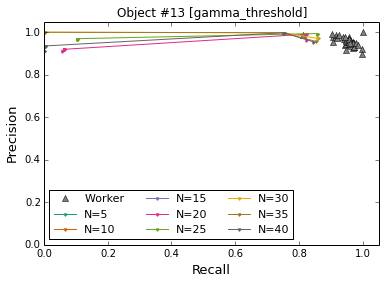

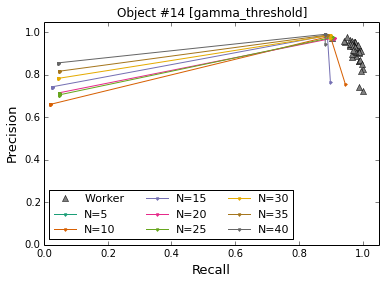

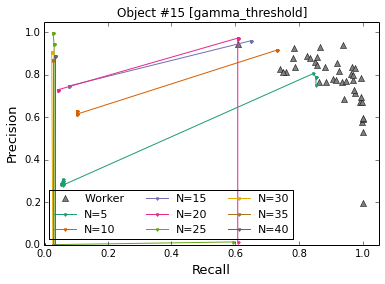

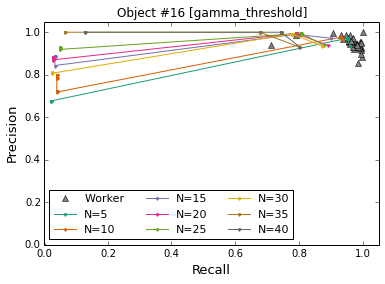

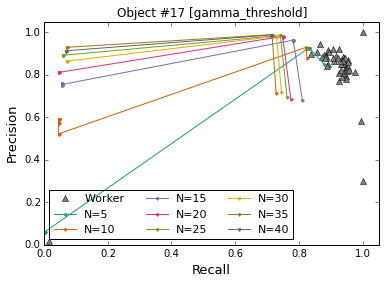

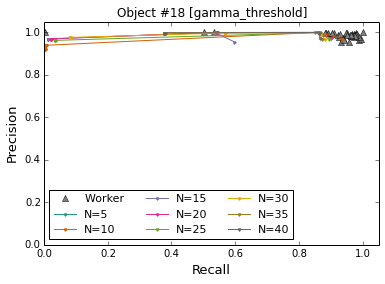

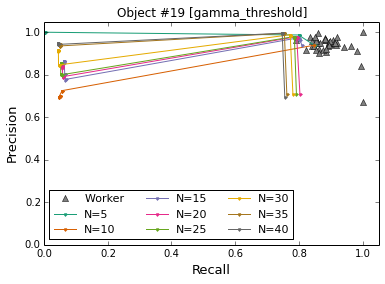

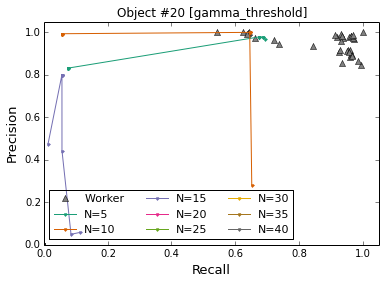

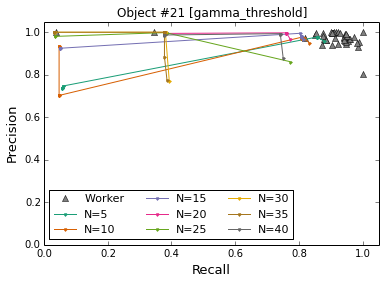

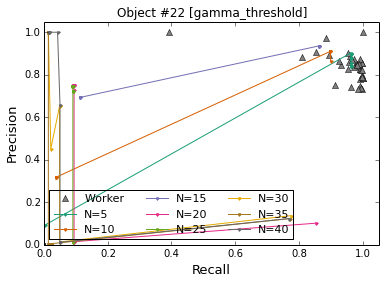

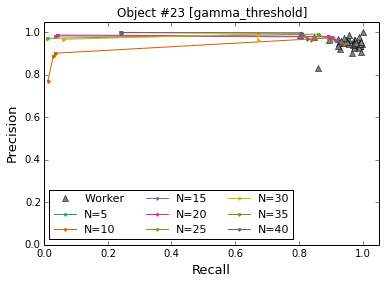

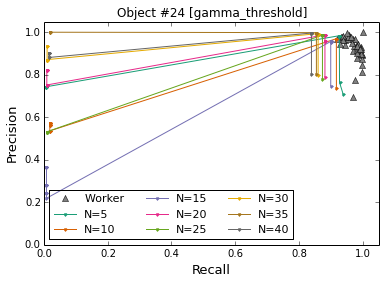

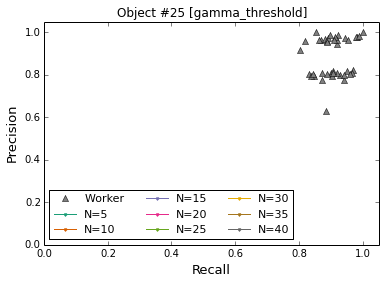

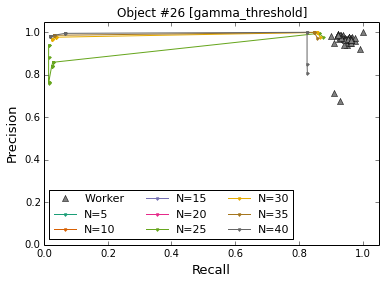

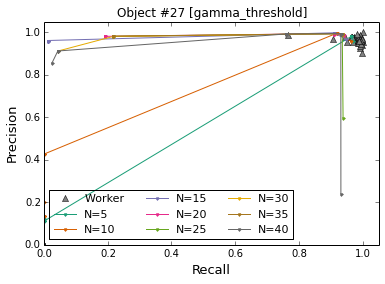

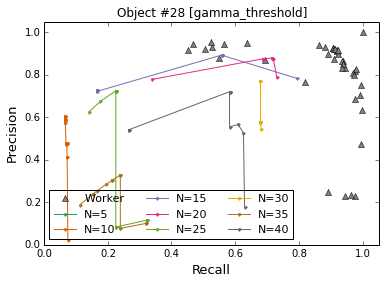

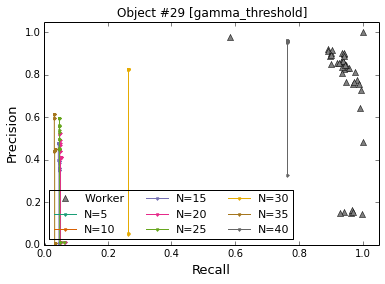

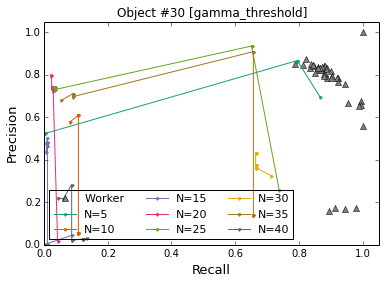

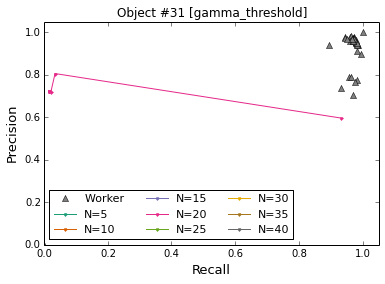

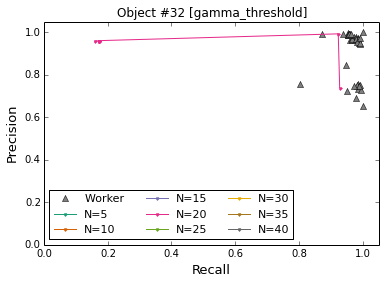

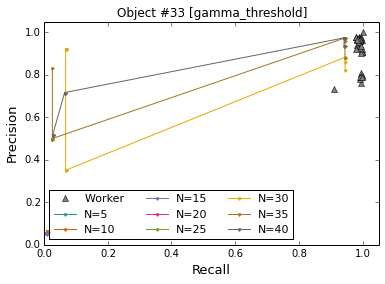

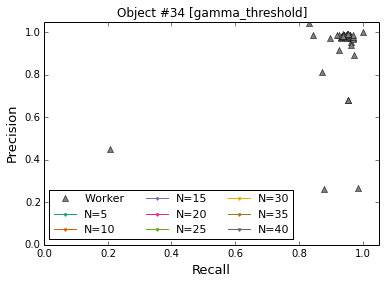

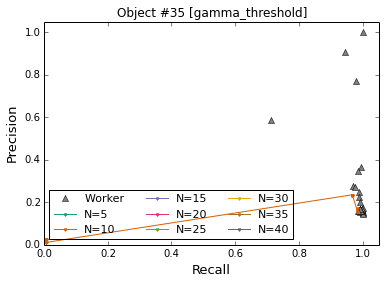

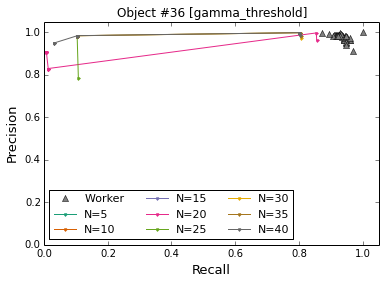

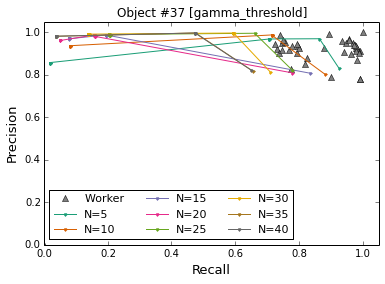

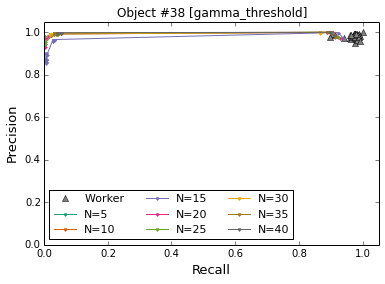

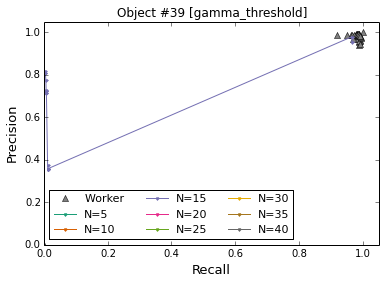

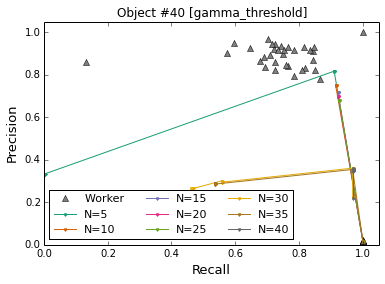

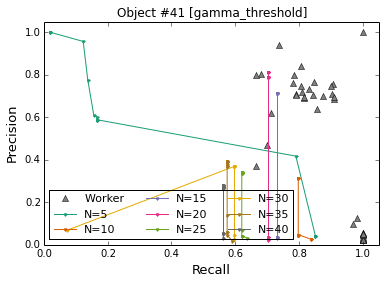

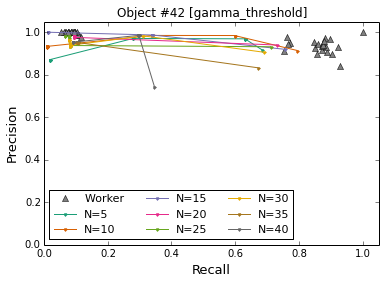

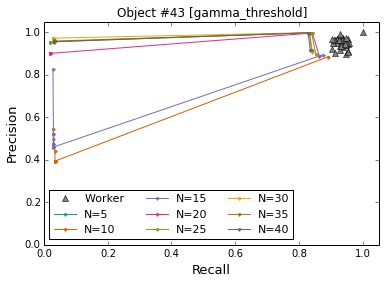

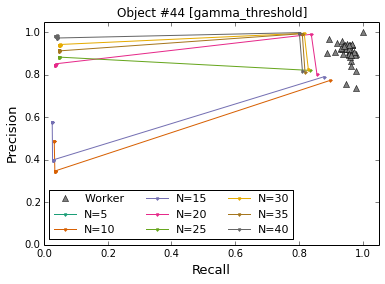

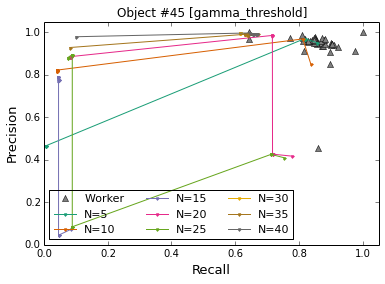

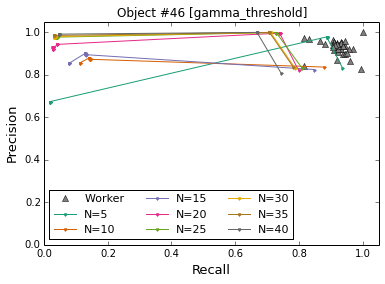

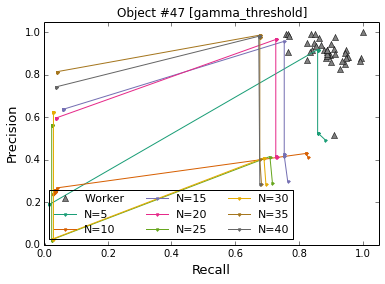

In [45]:
object_lst = list(object_tbl.id)

all_Nsample = np.arange(5,41,5)
colors=cm.Dark2(np.linspace(0,1,len(all_Nsample)))
for objid in tqdm(object_lst):
    for n,i in zip(all_Nsample,range(len(all_Nsample))):
        if i==0:
            plot_postprocess_PR_curves(objid,method='gamma_threshold',sampleNworker=n,color=colors[i],new_canvas=True)
        else:
            plot_postprocess_PR_curves(objid,method='gamma_threshold',color=colors[i],sampleNworker=n,legend=True)

OSError: [Errno 2] No such file or directory: '10_worker_output/'

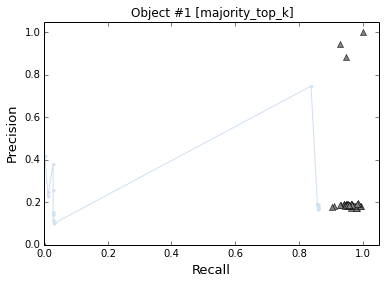

In [52]:
object_lst = list(object_tbl.id)

all_Nsample = np.arange(5,41,5)
cmap_lst = [cm.Blues,cm.OrRd,cm.Purples]
for objid in object_lst[:1]:
    for method,method_i in tqdm(zip(['majority_top_k',"gamma_threshold","gamma_top_k"],range(3))):
        colors=cmap_lst[method_i](np.linspace(0.2,1,len(all_Nsample)))
        for n,i in zip(all_Nsample,range(len(all_Nsample))):
            if i==0:
                plot_postprocess_PR_curves(objid,method=method,sampleNworker=n,color=colors[i],new_canvas=True)
            else:
                plot_postprocess_PR_curves(objid,method=method,color=colors[i],sampleNworker=n)

In [72]:
cd ../

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [81]:
cd output/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


In [ ]:
def plot_multibatch_sampling_postprocess_PR_curves(objid,Nbatches=1,method="majority_top_k",new_canvas=False,experiment_idx=0,color='blue',legend=False,sampleNworker=-1,PLOT_WORKER=True):
    '''
    Plot PR curves for each object for one post-processing methods
    sampled thorugh 
    new_canvas: True, if initialization of new canvas
    '''
    DATA_DIR = 'output'
    if new_canvas: 
        plt.figure()
        plt.title("Object #{0} [{1}]".format(objid,method))
        plt.xlim(0,1.05)
        plt.ylim(0,1.05)
        plt.ylabel("Precision",fontsize=13)
        plt.xlabel("Recall",fontsize=13)

    if sampleNworker!=-1:
        DATA_DIR= '{0}_worker_output_0/'.format(sampleNworker)
        os.chdir("../"+DATA_DIR)
    # Worker Individual Precision and Recall based on their BB drawn for this object
    worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid)
    if new_canvas and PLOT_WORKER:
        plt.plot(worker_recall_lst ,worker_precision_lst,'^',color="gray",label="Worker")
    # Plotting PR from Top-k Majority vote 
    os.chdir("..")
    tiles, objIndicatorMat = createObjIndicatorMatrix(objid,PRINT=False,PLOT=False)
    all_precision_lst = []
    all_recall_lst = []
    for batch_i in range(Nbatches):
        DATA_DIR='{0}_worker_output_{1}/'.format(sampleNworker,batch_i)
        os.chdir(DATA_DIR)
        precision_lst = []
        recall_lst = []
#         tiles = pkl.load(open("tiles{}.pkl".format(objid),'r'))
        if method=='majority_top_k':
            param_lst = np.arange(1,len(tiles),max(int((len(tiles)-1)/30.),1))
            for  k in param_lst:
                precision,recall= compute_PR_obj(objid,majority_topk=k)
                precision_lst.append(precision)
                recall_lst.append(recall)
        elif method=="gamma_threshold":
            param_lst = np.linspace(0,0.95,20)
            for  threshold in param_lst :
                precision,recall= compute_PR_obj(objid,threshold=threshold)
                precision_lst.append(precision)
                recall_lst.append(recall)
        elif method=="gamma_top_k":
            param_lst = np.arange(1,len(tiles),max(int((len(tiles)-1)/30.),1))
            for  k in param_lst :
                precision,recall= compute_PR_obj(objid,2,topk=k)
                precision_lst.append(precision)
                recall_lst.append(recall)
        all_precision_lst.append(precision_lst)
        all_recall_lst.append(recall_lst)
        os.chdir("..")
    all_recall_lst = np.array(all_recall_lst)
    all_precision_lst = np.array(all_precision_lst)

    recall_lst = np.mean(all_recall_lst,axis=0)
    precision_lst = np.mean(all_precision_lst,axis=0)    
    plt.plot(recall_lst,precision_lst, linestyle='-', linewidth=1,marker='.',color=color,label="N={}".format(sampleNworker))
    if legend: plt.legend(loc="lower left",ncol=3,fontsize=11,numpoints=1)
    
    plt.savefig("../sampleWorker_PR_obj_{0}_{1}_averaged{2}batches.pdf".format(objid,method,Nbatches))
    return precision_lst,recall_lst

In [119]:
cd output/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


 38%|███▊      | 3/8 [08:58<14:58,  0.01it/s]

KeyboardInterrupt: 

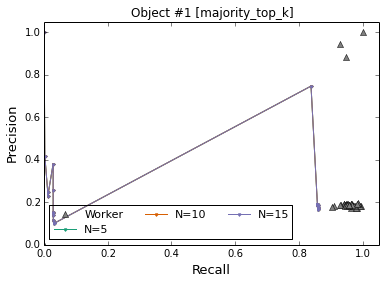

In [120]:
object_lst = list(object_tbl.id)

all_Nsample = np.arange(5,41,5)
colors=cm.Dark2(np.linspace(0,1,len(all_Nsample)))
for objid in object_lst[:1]:
    for n,i in  tqdm(zip(all_Nsample,range(len(all_Nsample)))):
        if i==0:
            precision_lst,recall_lst=plot_multibatch_sampling_postprocess_PR_curves(objid,method='majority_top_k',sampleNworker=n,color=colors[i],new_canvas=True)
        else:
            precision_lst,recall_lst=plot_multibatch_sampling_postprocess_PR_curves(objid,method='majority_top_k',color=colors[i],sampleNworker=n,legend=True)

In [126]:
cd output/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


OSError: [Errno 2] No such file or directory: '../20_worker_output/'

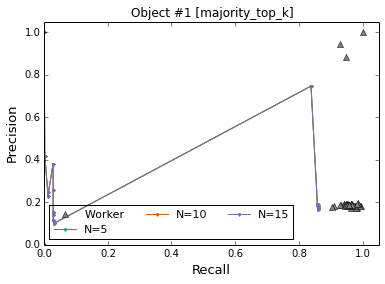

In [128]:
object_lst = list(object_tbl.id)

all_Nsample = np.arange(5,41,5)
colors=cm.Dark2(np.linspace(0,1,len(all_Nsample)))
for objid in tqdm(object_lst):
    for n,i in zip(all_Nsample,range(len(all_Nsample))):
        if i==0:
            plot_postprocess_PR_curves(objid,method='majority_top_k',sampleNworker=n,color=colors[i],new_canvas=True)
        else:
            plot_postprocess_PR_curves(objid,method='majority_top_k',color=colors[i],sampleNworker=n,legend=True)